#### Example 1: Isobaric evaporation of LNG in a large tank for long-term storage

This notebook sets up the isobaric evaporation of liquefied natural gas in a 165,000 m $^3$ storage tank.

## Desired input and output
* Tank characteristics: .CSV file with tank geometrical properties
* Cryogen: .CSV file with the cryogen ID consistent with CoolProp
* Popular cryogens: hydrogen, methane, nitrogen, oxygen.

In [1]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

#### Use example

Analyse BOG rates of liquid hydrogen in a retrofitted LNG storage tank,and compare it to methane BOG rates

In [2]:
# Retrofitted LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 76.4 # Internal diameter / m
d_o = 80   # External diameter / m
T_air = 298.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.0371 # W/m2/K
U_V = 0.0371 # W/m2/K


# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 60000 # W, 

# Vertically orientated cylindrical tank volume
V_tank = 165000 #m^3

# Initial liquid filling / Dimensionless
LF = 0.97 

# Specify tank operating pressure
P = 100000 # Pa

# Initialize tank
large_tank = Tank(d_i, d_o, V_tank, LF)
large_tank.set_HeatTransProps(U_L, U_V, T_air, Q_roof, Q_b)

In [3]:
methane = Cryogen(name = "methane")
methane.set_coolprops("methane", P)
large_tank.cryogen = methane
print("The evaporation rate of " + methane.name + " is %.1f kg/h" % (large_tank.b_l_dot * 3600))

The evaporation rate of methane is 427.9 kg/h


Liquid nitrogen properties for Linde tank calculations

#### Simulation setup and execution

In [15]:
# Create grid
large_tank.z_grid = np.linspace(0, large_tank.l * (1-large_tank.LF), 40)

# Insulated roof
large_tank.U_roof = 0

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
large_tank.time_interval = 60

# Time step that will separate vapour temperature profile
# plots
large_tank.plot_interval = 3600*6

# Simulate the evaporation
large_tank.evaporate(3600*24)

#### Visualisation of results

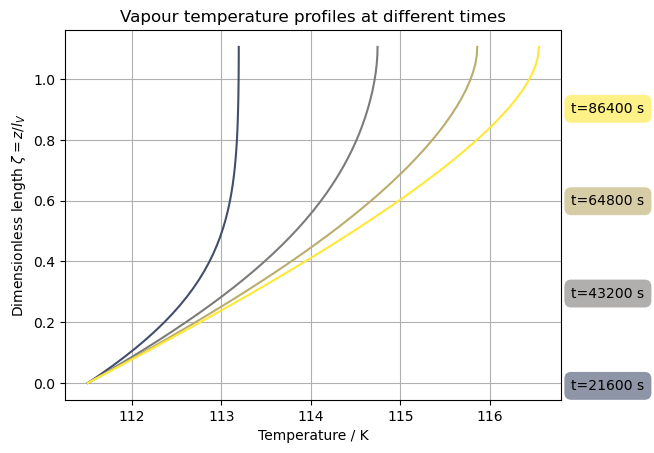

In [16]:
# Visualise the plot
large_tank.plot_tv()

In [ ]:
large_tank.plot_V_L

Text(0, 0.5, '$ V_L / m^3$')

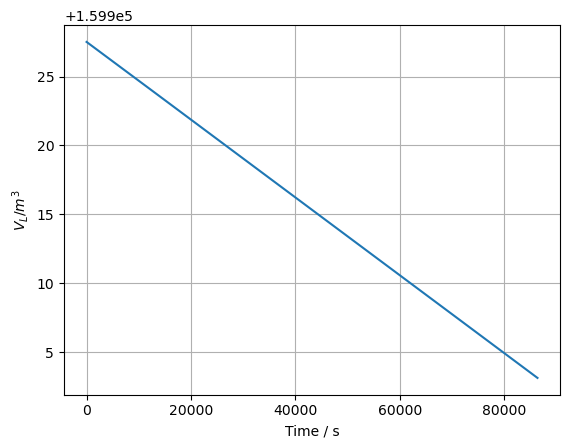

In [17]:
# Access to the liquid volume
plt.plot(large_tank.sol.t, large_tank.sol.y[0])
plt.grid()
plt.xlabel('Time / s')
plt.ylabel('$ V_L / m^3$')

Text(0, 0.5, '$ B_L / kg/h$')

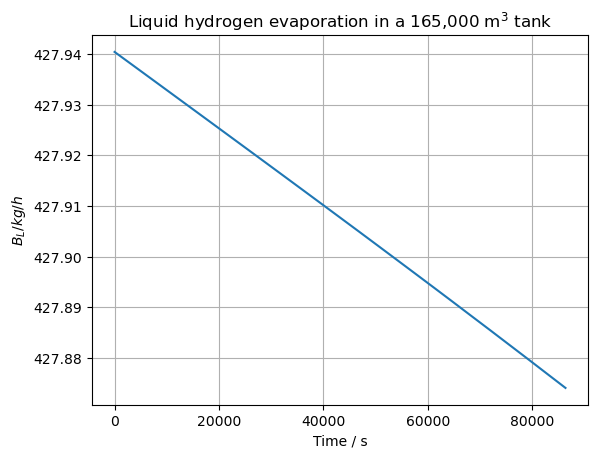

In [9]:
# Extract evaporation rate and convert to kg/h
B_L = large_tank.evap_rate() * 3600

# Visualise evaporation rate
plt.plot(large_tank.sol.t, B_L) 
plt.grid()
plt.title("Liquid hydrogen evaporation in a 165,000 m$^3$ tank")
plt.xlabel('Time / s')
plt.ylabel('$ B_L / kg/h$')

In [11]:
large_tank.plot_tv()

AttributeError: 'Tank' object has no attribute 'plot_interval'